Q. How would you use a tool like Great Expectations to assess data quality and correctness?

Great Expectations is a tool used to assess data quality and correctness by defining "expectations" that describe the desired properties of your data. These expectations can check for conditions like non-null values, specific data types, value ranges, uniqueness, or even more complex custom rules. Once set, you can run validation checks on your data, generating reports that highlight any deviations from the defined expectations. This helps ensure data integrity and provides transparency on data quality throughout your pipeline.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the master database
master_db = pd.read_csv(r"C:\Users\ABHISHEK BANKAWAT\Desktop\Data_Engineering_Task\Step2_DataPipeline\datapipeline\data\08_reporting\master_database.csv")


## 1.How many distinct patients are in the dataset?

In [2]:
master_db.columns


Index(['patient_id', 'birth_date', 'deathdate', 'social_security_number',
       'drivers', 'passport', 'prefix', 'first_name', 'last_name', 'suffix',
       'maiden_name', 'marital', 'race_x', 'ethnicity_x', 'birthplace',
       'address', 'city', 'state', 'county', 'fips', 'zipcode', 'latitude',
       'longitude', 'healthcare_expenses', 'healthcare_coverage',
       'annual_income', 'id', 'gender_x', 'race_y', 'ethnicity_y', 'age_begin',
       'age_end', 'pathology', 'num_symptoms', 'gender_y', 'Rash',
       'Joint Pain', 'Fatigue', 'Fever', 'start_datetime', 'stop_y', 'payer_y',
       'encounter_id', 'medication_id', 'description', 'base_cost',
       'payer_coverage_y', 'dispenses', 'totalcost', 'reasoncode_y',
       'reasondescription_y'],
      dtype='object')

In [28]:
# 1. Count distinct patients
print(master_db['patient_id'].value_counts().count())

948


## 2. Plot the distinct medications over time

[11/29/24 17:48:52] WARNING  C:\Users\ABHISHEK                                                      warnings.py:110
                             BANKAWAT\AppData\Local\Temp\ipykernel_15224\2250205904.py:3:                          
                             UserWarning: Converting to PeriodArray/Index representation will drop                 
                             timezone information.                                                                 
                               med_time_series =                                                                   
                             master_db.groupby([master_db['start_datetime'].dt.to_period('Y'),                     
                             'description'])['description'].count().unstack()                                      
                                                                                                                   

<Figure size 5000x2000 with 0 Axes>

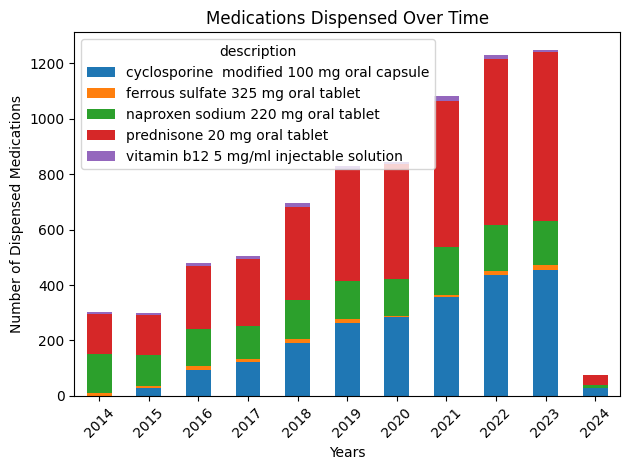

In [29]:
# 2. Medication over time plotting
master_db['start_datetime'] = pd.to_datetime(master_db['start_datetime'], errors='coerce')
med_time_series = master_db.groupby([master_db['start_datetime'].dt.to_period('Y'), 'description'])['description'].count().unstack()
plt.figure(figsize=(50,20))
med_time_series.plot(kind='bar', stacked=True)
plt.title('Medications Dispensed Over Time')
plt.xlabel('Years')
plt.ylabel('Number of Dispensed Medications')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3. Create a pie chart for the percentage of patients by racial category and gender

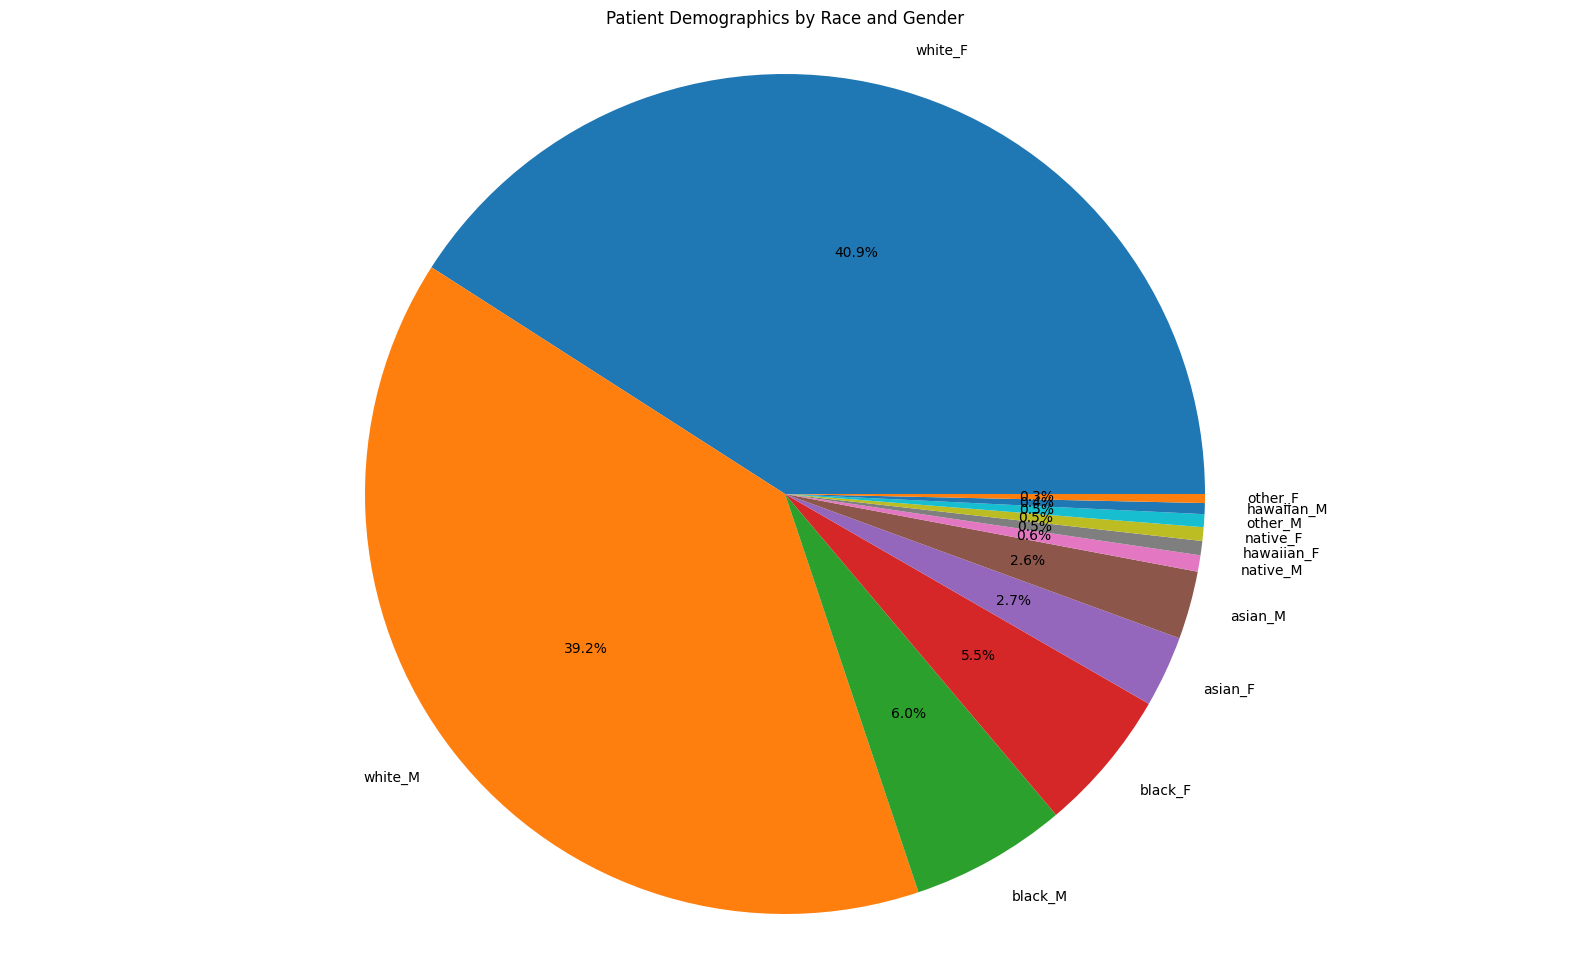

In [15]:
 #3. Pie chart of patient demographics
master_db['race_gender'] = master_db['race_x'] + '_' + master_db['gender_x']
race_gender_counts = master_db['race_gender'].value_counts()
plt.figure(figsize=(20,12))
plt.pie(race_gender_counts, labels=race_gender_counts.index, autopct='%1.1f%%')
plt.title('Patient Demographics by Race and Gender')
plt.axis('equal')
plt.show()

In [38]:
# Check if all symptom categories are >= 30 for each row
condition = (master_db['Rash'] >= 30) & (master_db['Joint Pain'] >= 30) & (master_db['Fatigue'] >= 30) & (master_db['Fever'] >= 30)

# Calculate the percentage of rows that meet the condition
percentage = (condition.sum() / len(master_db)) * 100

print(f"Percentage of patients with all symptoms >= 30: {percentage}%")

Percentage of patients with all symptoms >= 30: 0.0%
